Часть C

Сколько различных групп пользователей можно выделить из данных?
• Каковы отличительные особенности этих групп? Как их можно интерпретировать?

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
data = pd.read_csv('/content/task_for_a_prod_analytics_trainee_part_c.csv')

In [ ]:
data.head()

,hashed_user_id,user_age,user_sex,user_friends,user_communities_count,user_fans_count,user_subscriptions_count,device_brand,device_model,days_in_vk_1_week,days_in_vk_2_weeks,days_in_vk_4_weeks,days_in_vk_8_weeks,messaging_total,calls_accepted,timespent_total,timespent_im,timespent_feed,timespent_photo,timespent_video,timespent_clips,timespent_audio,timespent_story
0,$1VAQ97BmCCZc,26,male,481,476,361,177,lge,LG-M250,7,14,28,56,1,0,501,0,55,0,0,0,0,0
1,$1v/FKogrWnz2,26,female,115,72,419,0,Apple,iPhone 7,7,14,28,56,23,0,0,0,0,0,0,0,0,0
2,$1eoMEtyVB3XM,26,female,297,317,2681,0,Apple,iPhone 11 Pro Max,7,14,28,56,33,0,0,0,0,0,0,0,0,0
3,$12ZhvNRMpcZU,20,male,147,130,216,0,samsung,SM-G970F,7,14,28,56,1,0,5085,101,2371,0,0,0,0,0
4,$1mD0tDgB13tk,39,male,138,311,51,33,NaN,NaN,7,14,28,56,3,0,1301,0,0,0,0,0,0,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125893 entries, 0 to 125892
Data columns (total 23 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   hashed_user_id            125893 non-null  object
 1   user_age                  125893 non-null  int64 
 2   user_sex                  125893 non-null  object
 3   user_friends              125893 non-null  int64 
 4   user_communities_count    125893 non-null  int64 
 5   user_fans_count           125893 non-null  int64 
 6   user_subscriptions_count  125893 non-null  int64 
 7   device_brand              107049 non-null  object
 8   device_model              106748 non-null  object
 9   days_in_vk_1_week         125893 non-null  int64 
 10  days_in_vk_2_weeks        125893 non-null  int64 
 11  days_in_vk_4_weeks        125893 non-null  int64 
 12  days_in_vk_8_weeks        125893 non-null  int64 
 13  messaging_total           125893 non-null  int64 
 14  call

In [ ]:
data.describe()

,user_age,user_friends,user_communities_count,user_fans_count,user_subscriptions_count,days_in_vk_1_week,days_in_vk_2_weeks,days_in_vk_4_weeks,days_in_vk_8_weeks,messaging_total,calls_accepted,timespent_total,timespent_im,timespent_feed,timespent_photo,timespent_video,timespent_clips,timespent_audio,timespent_story
count,125893.000000,125893.000000,125893.000000,125893.000000,125893.000000,125893.000000,125893.000000,125893.00000,125893.000000,125893.000000,125893.000000,125893.000000,125893.000000,125893.000000,125893.000000,125893.000000,125893.000000,125893.000000,125893.000000
mean,34.459168,222.997315,232.251865,193.345929,37.119109,6.671960,13.246829,26.35272,52.394947,53.359043,0.029350,4413.406480,625.537671,1112.688871,202.838816,296.016339,3.784261,58.317015,7.910329
std,20.505505,566.932642,386.763992,737.468913,226.131946,0.978889,2.063192,4.28400,8.952063,447.576857,0.278273,6015.906566,1837.310044,1968.557926,451.986990,1255.317444,56.554741,417.691275,62.912777
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.000000,48.000000,55.000000,24.000000,1.000000,7.000000,14.000000,27.00000,54.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,28.000000,110.000000,119.000000,88.000000,4.000000,7.000000,14.000000,28.00000,56.000000,7.000000,0.000000,2331.000000,0.000000,146.000000,6.000000,0.000000,0.000000,0.000000,0.000000
75%,41.000000,216.000000,254.000000,198.000000,16.000000,7.000000,14.000000,28.00000,56.000000,49.000000,0.000000,6299.000000,300.000000,1512.000000,229.000000,97.000000,0.000000,0.000000,0.000000
max,120.000000,10000.000000,5000.000000,61271.000000,9115.000000,7.000000,14.000000,28.00000,56.000000,126172.000000,18.000000,265774.000000,80450.000000,33837.000000,21936.000000,49692.000000,5059.000000,30370.000000,5777.000000


In [ ]:
data.agg(['count', 'size', 'nunique'])

,hashed_user_id,user_age,user_sex,user_friends,user_communities_count,user_fans_count,user_subscriptions_count,device_brand,device_model,days_in_vk_1_week,days_in_vk_2_weeks,days_in_vk_4_weeks,days_in_vk_8_weeks,messaging_total,calls_accepted,timespent_total,timespent_im,timespent_feed,timespent_photo,timespent_video,timespent_clips,timespent_audio,timespent_story
count,125893,125893,125893,125893,125893,125893,125893,107049,106748,125893,125893,125893,125893,125893,125893,125893,125893,125893,125893,125893,125893,125893,125893
size,125893,125893,125893,125893,125893,125893,125893,125893,125893,125893,125893,125893,125893,125893,125893,125893,125893,125893,125893,125893,125893,125893,125893
nunique,125659,109,3,3042,2687,2584,1511,182,2253,7,14,28,56,1103,14,19930,7712,8674,2864,4927,616,2317,738


In [ ]:
data.user_age.isnull().sum(axis = 0)

0

In [ ]:
data.set_index('hashed_user_id', inplace=True)

Разобъем группы по возрасту.

In [ ]:
labels = ['11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80','81-90','91-100','101-110','111-120']
data['age_group'] = pd.cut(data.user_age, [10,20,30,40,50,60,70,80,90,100,110,120], right=True, labels=labels)
data['age_group'] = data['age_group'].astype('category')
lens = data.copy()
lens.head()

,user_age,user_sex,user_friends,user_communities_count,user_fans_count,user_subscriptions_count,device_brand,device_model,days_in_vk_1_week,days_in_vk_2_weeks,days_in_vk_4_weeks,days_in_vk_8_weeks,messaging_total,calls_accepted,timespent_total,timespent_im,timespent_feed,timespent_photo,timespent_video,timespent_clips,timespent_audio,timespent_story,age_group
hashed_user_id,,,,,,,,,,,,,,,,,,,,,,,
$1VAQ97BmCCZc,26,male,481,476,361,177,lge,LG-M250,7,14,28,56,1,0,501,0,55,0,0,0,0,0,21-30
$1v/FKogrWnz2,26,female,115,72,419,0,Apple,iPhone 7,7,14,28,56,23,0,0,0,0,0,0,0,0,0,21-30
$1eoMEtyVB3XM,26,female,297,317,2681,0,Apple,iPhone 11 Pro Max,7,14,28,56,33,0,0,0,0,0,0,0,0,0,21-30
$12ZhvNRMpcZU,20,male,147,130,216,0,samsung,SM-G970F,7,14,28,56,1,0,5085,101,2371,0,0,0,0,0,11-20
$1mD0tDgB13tk,39,male,138,311,51,33,NaN,NaN,7,14,28,56,3,0,1301,0,0,0,0,0,0,0,31-40


In [ ]:
lens = lens.reset_index()

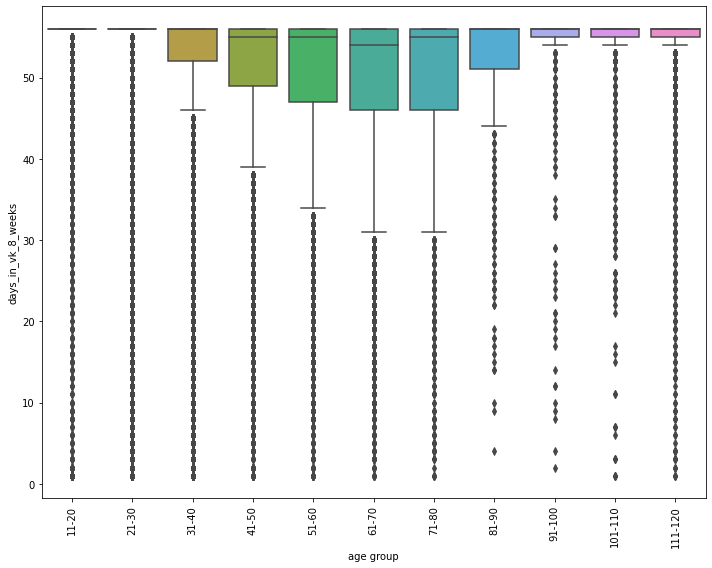

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))
g = sns.boxplot(x="age_group", y="days_in_vk_8_weeks", data=lens);
plt.setp(ax.get_xticklabels(), rotation=90)
plt.xlabel('age group');
plt.ylabel('days_in_vk_8_weeks');
plt.tight_layout()
plt.show()

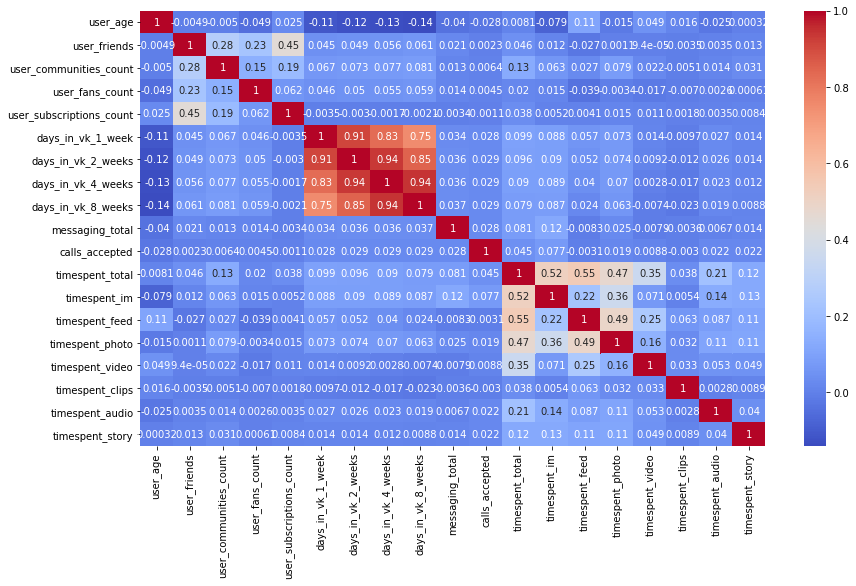

In [ ]:

corr_df = lens.corr()

f, ax = plt.subplots(figsize=(14, 8))


sns.heatmap(data=corr_df, annot = True, cmap='coolwarm')

sns.despine(left=True, bottom=True)

Можно разбить группы по количеству друзей: интервалами или квантилями.

Index(['user_age', 'timespent_feed', 'timespent_video',
       'user_subscriptions_count', 'timespent_clips', 'timespent_total',
       'timespent_story', 'user_friends', 'user_communities_count',
       'timespent_photo', 'timespent_audio', 'calls_accepted',
       'messaging_total', 'user_fans_count'],
      dtype='object')


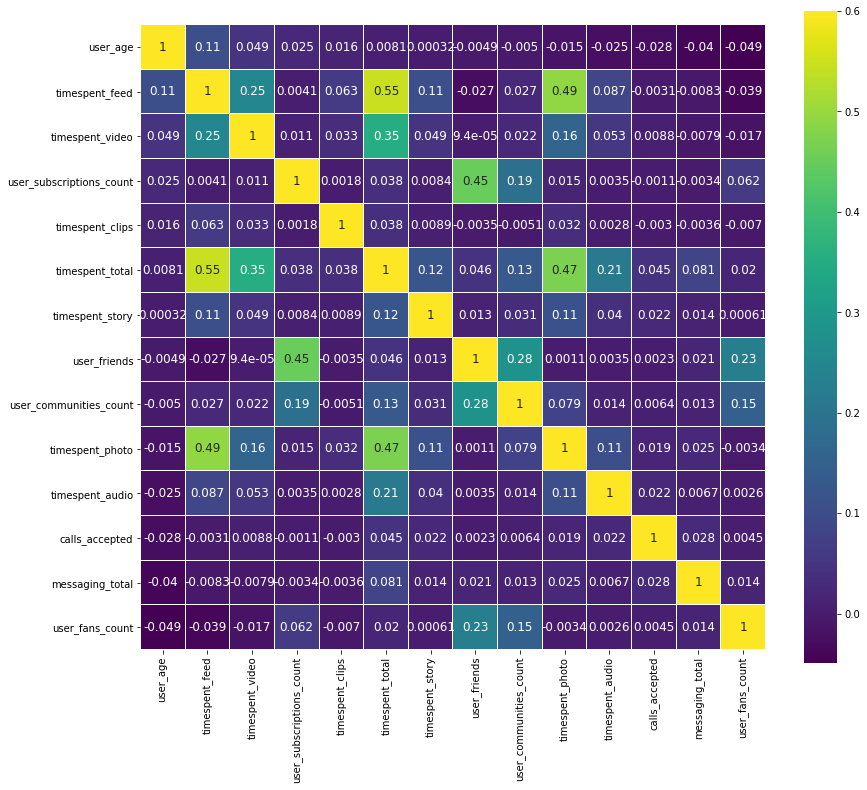

In [ ]:
k= 14
cols = corr_df.nlargest(k,'user_age')['user_age'].index
print(cols)
cm = np.corrcoef(lens[cols].values.T)
f , ax = plt.subplots(figsize = (14,12))
sns.heatmap(cm, vmax=.6, linewidths=0.01,square=True,annot=True,cmap='viridis',
            linecolor="white",xticklabels = cols.values ,annot_kws = {'size':12},yticklabels = cols.values)

In [ ]:
data.user_friends.values

array([481, 115, 297, ..., 177, 128,  38])

In [ ]:
labels = ['0-100', '101-200', '201-300', '301-400', '401-500', '501-600', '601-700','701-800','801-900','901-1000']
data['friends_group'] = pd.cut(data.user_friends, [0,100,200,300,400,500,600,700,800,900,1000], right=True, labels=labels)
data['friends_group'] = data['friends_group'].astype('category')
lens = data.copy()
lens.head()

,user_age,user_sex,user_friends,user_communities_count,user_fans_count,user_subscriptions_count,device_brand,device_model,days_in_vk_1_week,days_in_vk_2_weeks,days_in_vk_4_weeks,days_in_vk_8_weeks,messaging_total,calls_accepted,timespent_total,timespent_im,timespent_feed,timespent_photo,timespent_video,timespent_clips,timespent_audio,timespent_story,age_group,friends_group
hashed_user_id,,,,,,,,,,,,,,,,,,,,,,,,
$1VAQ97BmCCZc,26,male,481,476,361,177,lge,LG-M250,7,14,28,56,1,0,501,0,55,0,0,0,0,0,21-30,401-500
$1v/FKogrWnz2,26,female,115,72,419,0,Apple,iPhone 7,7,14,28,56,23,0,0,0,0,0,0,0,0,0,21-30,101-200
$1eoMEtyVB3XM,26,female,297,317,2681,0,Apple,iPhone 11 Pro Max,7,14,28,56,33,0,0,0,0,0,0,0,0,0,21-30,201-300
$12ZhvNRMpcZU,20,male,147,130,216,0,samsung,SM-G970F,7,14,28,56,1,0,5085,101,2371,0,0,0,0,0,11-20,101-200
$1mD0tDgB13tk,39,male,138,311,51,33,NaN,NaN,7,14,28,56,3,0,1301,0,0,0,0,0,0,0,31-40,101-200


/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


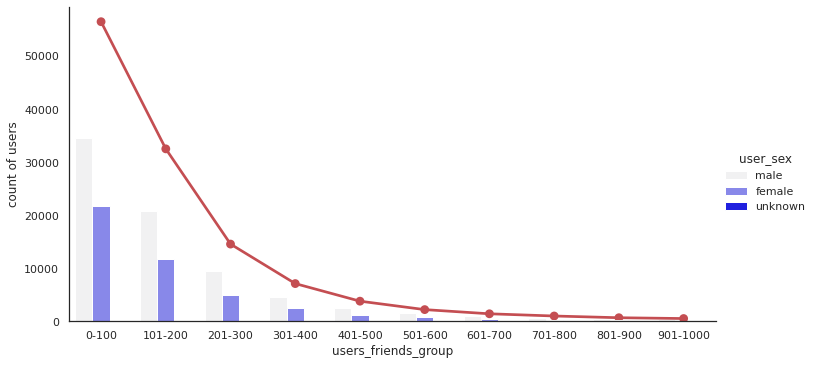

In [ ]:
sns.set()
groupByAgeGroupAndGender = lens.groupby(['friends_group']).size().reset_index(name='counts')
with sns.axes_style('white'):
    g = sns.factorplot("friends_group", data=lens, aspect=2,
                       kind="count", hue="user_sex", color='blue') 
    sns.pointplot(x='friends_group', y='counts', data=groupByAgeGroupAndGender, color='r')

plt.ylabel('count of users')
plt.xlabel('users_friends_group');
plt.show()

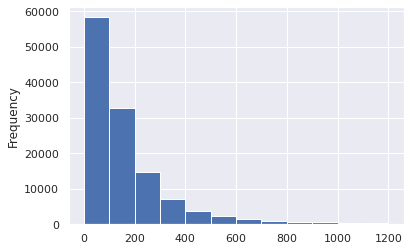

In [ ]:
data.user_friends.plot(kind='hist', bins=[0,100,200,300,400,500,600,700,800,900,1000,1100,1200])

In [ ]:
data.user_friends.describe

<bound method NDFrame.describe of hashed_user_id
$1VAQ97BmCCZc    481
$1v/FKogrWnz2    115
$1eoMEtyVB3XM    297
$12ZhvNRMpcZU    147
$1mD0tDgB13tk    138
                ... 
$1mt9c83esx1E     15
$1u.Y5CEEZr0Q    330
$1y3yJsQ4qK5s    177
$1nTs2FXQI4mI    128
$1VOA0wvS2MLc     38
Name: user_friends, Length: 125893, dtype: int64>

In [ ]:
labels_friends = [1,2,3,4]

data['quantile_friends'] = pd.qcut(data.user_friends,
                              q=4,
                              labels=labels_friends)
data.tail()

,user_age,user_sex,user_friends,user_communities_count,user_fans_count,user_subscriptions_count,device_brand,device_model,days_in_vk_1_week,days_in_vk_2_weeks,days_in_vk_4_weeks,days_in_vk_8_weeks,messaging_total,calls_accepted,timespent_total,timespent_im,timespent_feed,timespent_photo,timespent_video,timespent_clips,timespent_audio,timespent_story,age_group,friends_group,quantile_friends
hashed_user_id,,,,,,,,,,,,,,,,,,,,,,,,,
$1mt9c83esx1E,41,male,15,86,4,0,NaN,NaN,7,14,28,56,15,0,30241,0,0,0,0,0,0,0,41-50,0-100,1
$1u.Y5CEEZr0Q,28,male,330,183,99,5,NaN,NaN,7,14,28,56,176,0,7306,1846,3460,676,632,0,0,0,21-30,301-400,4
$1y3yJsQ4qK5s,0,female,177,1193,25,13,HUAWEI,MAR-LX3A,7,14,28,56,11,0,1851,881,334,217,20,0,0,0,NaN,101-200,3
$1nTs2FXQI4mI,46,female,128,264,285,40,Nokia,Nokia 8.1,7,14,28,56,3,0,12522,1061,3583,902,5737,0,0,0,41-50,101-200,3
$1VOA0wvS2MLc,26,male,38,392,129,0,HUAWEI,DRA-LX5,7,14,28,54,15,0,5685,410,3688,778,222,0,0,102,21-30,0-100,1


In [ ]:
data.quantile_friends.value_counts()

1    31671
2    31508
4    31398
3    31316
Name: quantile_friends, dtype: int64

Можно разбить группы по поведению.

In [ ]:
lens = data[['timespent_im',	'timespent_feed',	'timespent_photo',	'timespent_video',	'timespent_clips',	'timespent_audio',	'timespent_story'	]].copy()
lens = lens.loc[(lens!=0).any(1)]
lens.head()

,timespent_im,timespent_feed,timespent_photo,timespent_video,timespent_clips,timespent_audio,timespent_story
hashed_user_id,,,,,,,
$1VAQ97BmCCZc,0,55,0,0,0,0,0
$12ZhvNRMpcZU,101,2371,0,0,0,0,0
$1WYpYdge7ipo,0,452,303,0,0,0,0
$10lDXhbG5VEw,4,2543,13,7470,0,0,0
$1KcByhj1JXdE,0,2218,311,25,0,0,0


In [ ]:
lens['maximum'] = lens.apply(lambda x: lens.columns[x.argmax()], axis = 1)

In [ ]:
lens.head()

,timespent_im,timespent_feed,timespent_photo,timespent_video,timespent_clips,timespent_audio,timespent_story,maximum
hashed_user_id,,,,,,,,
$1VAQ97BmCCZc,0,55,0,0,0,0,0,timespent_feed
$12ZhvNRMpcZU,101,2371,0,0,0,0,0,timespent_feed
$1WYpYdge7ipo,0,452,303,0,0,0,0,timespent_feed
$10lDXhbG5VEw,4,2543,13,7470,0,0,0,timespent_video
$1KcByhj1JXdE,0,2218,311,25,0,0,0,timespent_feed
